#### MiniEDA
Comenezaremos a analizar el dataset que creamos en el notebook tratamiento de datos
Modificaremos, trataremos nulos, identificaremos la variable objetivo y como veremos, tomaremos decisiones con respecto a ella y como afectará al resto del proyecto  
Ya que para poder predecir averías usaremos el histórico de vuelos realizados por la flota durante el mismo tiempo.   
Es un factor decisivo con respecto al deterioro de los componentes.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv("./data/combinada.csv", encoding="latin1")

In [41]:
df

,Fecha,Numero_vuelo,Station,AC,Minutos,ATA
0,2021-01-01,105,PDQ,avion 18,0.0,99
1,2021-01-01,106,PIQ,avion 18,0.0,99
2,2021-01-01,110,PIQ,avion 25,0.0,99
3,2021-01-01,128,CVU,avion 20,0.0,99
4,2021-01-01,145,PDQ,avion 25,0.0,99
...,...,...,...,...,...,...
203295,2023-09-30,NT309,PDQ,avion 23,18.0,29
203296,2023-09-30,NT420,PIQ,avion 16,41.0,21
203297,2023-09-30,NT5251,PIQ,avion 15,58.0,25
203298,2023-09-30,NT147,PDQ,avion 14,56.0,24


In [42]:
df.head()

,Fecha,Numero_vuelo,Station,AC,Minutos,ATA
0,2021-01-01,105,PDQ,avion 18,0.0,99
1,2021-01-01,106,PIQ,avion 18,0.0,99
2,2021-01-01,110,PIQ,avion 25,0.0,99
3,2021-01-01,128,CVU,avion 20,0.0,99
4,2021-01-01,145,PDQ,avion 25,0.0,99


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203300 entries, 0 to 203299
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Fecha         203300 non-null  object 
 1   Numero_vuelo  203300 non-null  object 
 2   Station       203300 non-null  object 
 3   AC            202442 non-null  object 
 4   Minutos       203300 non-null  float64
 5   ATA           203300 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.3+ MB


In [44]:
df.shape

(203300, 6)

Información  
El dataset tiene 203,300 registros y 6 columnas con la siguiente estructura:  
* Fecha: Fecha del registro (tipo object).  
* Numero_vuelo: Número de vuelo (tipo object).  
* Station: Estación relacionada (tipo object).  
* AC: Identificación del avión (tipo object) con valores faltantes.  
* Minutos: Duración en minutos (tipo float64).  
* ATA: Tipo de avería, que será nuestra variable objetivo (object).  

In [45]:
#Verificar si hay duplicados. A pesar de haber tratado antes los datos no está demás comprobarlo
df.duplicated().sum()

0

In [46]:
# Comprobar si hay nulos
df.isnull().sum()

Fecha             0
Numero_vuelo      0
Station           0
AC              858
Minutos           0
ATA               0
dtype: int64

In [47]:
# Distribución variable ATA (tarjet)
df['ATA'].value_counts()

ATA
99    131072
99     68915
25       317
05       251
12       227
52       205
24       196
UN       157
34       147
32       142
23       138
21       134
27       120
61       100
33       100
35        90
28        89
72        80
26        79
31        79
30        72
20        64
00        61
29        61
36        58
22        52
73        52
79        30
80        24
38        22
45        21
53        20
77        19
42        16
56        10
74        10
49        10
11         8
44         6
75         6
71         6
55         5
46         4
76         4
78         3
10         3
54         3
51         3
57         3
70         2
08         1
50         1
47         1
09         1
Name: count, dtype: int64

In [48]:
# Unificar los valores '99' en 'ATA'
# Convertir todos los valores de 'ATA' a cadenas para estandarizar
df['ATA'] = df['ATA'].astype(str)


In [49]:
# Verificar valores únicos nuevamente después de la corrección
df['ATA'].unique()

array(['99', '77', '33', '25', '52', '21', '34', '24', '27', '31', '30',
       'UN', '80', '35', '12', '72', '26', '23', '75', '05', '00', '57',
       '56', '28', '38', '73', '61', '32', '29', '22', '36', '51', '11',
       '79', '10', '20', '78', '42', '53', '45', '76', '49', '08', '44',
       '71', '55', '54', '46', '74', '50', '47', '09', '70'], dtype=object)

In [50]:
# Contar las frecuencias de cada valor único
df['ATA'].value_counts()

ATA
99    199987
25       317
05       251
12       227
52       205
24       196
UN       157
34       147
32       142
23       138
21       134
27       120
61       100
33       100
35        90
28        89
72        80
26        79
31        79
30        72
20        64
00        61
29        61
36        58
22        52
73        52
79        30
80        24
38        22
45        21
53        20
77        19
42        16
56        10
74        10
49        10
11         8
44         6
75         6
71         6
55         5
46         4
76         4
78         3
10         3
54         3
51         3
57         3
70         2
08         1
50         1
47         1
09         1
Name: count, dtype: int64

In [51]:
# Revisión de tipos de datos
df.dtypes

Fecha            object
Numero_vuelo     object
Station          object
AC               object
Minutos         float64
ATA              object
dtype: object

In [52]:
# Variables numéricas
df.describe()

,Minutos
count,203300.000000
mean,0.746066
std,13.012609
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1541.000000


Análisis preliminar:

* Valores faltantes:  
La columna AC tiene 858 valores faltantes.  
Las demás columnas no presentan valores nulos.    

* Duplicados:  
No hay registros duplicados.  
Columna ATA, tenemos 157 campos con UNK.  

* Variable numéricas:    
Solo una columna, Minutos.  
Media: 0.75 minutos, pero con un rango muy amplio (0 a 1541 minutos), hay existenciad de outliers y tenemos que revisarlos.
  
* Distribución de la variable objetivo ATA:    
La mayoría de las observaciones están etiquetadas con los códigos "99(sin avería)" (sumando 199,987 ocurrencias), es un desbalance significativo.  
Existen códigos de avería con muy pocos registros.  

Próximos pasos:
Limpieza de valores faltantes y transformación de los datos, en la columna AC y valores UNK en la columna ATA.  
Análisis visual para explorar distribuciones y relaciones.  
Revisión y tratamiento de outliers en la columna Minutos.  

In [53]:
# Esto lo hacemos porque en una de las versiones del tratamiento de datos que hicimos antes no tuvimos en cuenta que hubo desalineación y a mitad del miniEDA en una gráfica teníamos aviones con estaciones mezclados
# Contar el número de valores únicos en la columna 'Station'
num_valores_unicos_station = df['Station'].nunique()

# Obtener una lista de los valores únicos en 'Station'
valores_unicos_station = df['Station'].unique()
valores_unicos_station

array(['PDQ', 'PIQ', 'CVU', 'TER', 'SMA', 'FLW', 'HOR', 'PNA', 'OVD',
       'XRY', 'VIT', 'GRW', 'RAI', 'SID', 'VXE', 'BVC', 'SFL', 'FNC',
       'PXO', 'PMI', 'VGO', 'RMU', 'LIS', 'ZAZ', 'SDR', 'MMO', 'NKC',
       'SNE', 'SJJ', 'VLC', 'LFB', 'SVQ', 'REC', 'SJK', 'DSS', 'SCQ',
       'AGA', 'REU', 'LIL', 'MRS', 'TLS', 'TRN', 'VCE', 'LIN', 'EUN',
       'BCN', 'VIL', 'EAS', 'LCG', 'BIO', 'GLN', 'RAK', 'KRK', 'BJL',
       'MAH', 'VLL', 'FEZ', 'PDL', 'FLR', 'ALC', 'MGL', 'RBA', 'CMN',
       'AGP', 'GRX', 'AVR', 'PSA', 'ESU', 'TNG', 'IBZ', 'NDB', 'MAD'],
      dtype=object)

In [54]:
# Hay UNK en ATA, sabemos que por factores humanos hubo algún tipo de avería pero no supieron catalogarla. Creamos un código específico para ello 01 "averia sin identificar"
# Cambiar 'UN' por '01' en ATA
df['ATA'] = df['ATA'].replace('UN', '01')
# Convertimos "UN" a "01" para asignar un tipo de avería genérica y mantener la consistencia en los datos.
df['ATA'].value_counts()
# Antes UNK eran 157 y ahora es 01

ATA
99    199987
25       317
05       251
12       227
52       205
24       196
01       157
34       147
32       142
23       138
21       134
27       120
61       100
33       100
35        90
28        89
72        80
26        79
31        79
30        72
20        64
00        61
29        61
36        58
22        52
73        52
79        30
80        24
38        22
45        21
53        20
77        19
42        16
56        10
74        10
49        10
11         8
44         6
75         6
71         6
55         5
46         4
76         4
78         3
10         3
54         3
51         3
57         3
70         2
08         1
50         1
47         1
09         1
Name: count, dtype: int64

In [55]:
# Vamos a distribuir de forma equitativa los nulos según el procentaje de cada avión para tener una muestra más representativa.
# Calcular porcentaje de cada matrícula
proporciones = df['AC'].value_counts(normalize=True)*100
n_nulos = df['AC'].isna().sum()

In [56]:
# Calcular la cantidad proporcional de nulos para cada estación
proportional_nulos = (proporciones / 100 * n_nulos).round().astype(int) 

In [57]:
# Ajustar para asegurar que la suma total coincide con el número de nulos
difference = n_nulos - proportional_nulos.sum()


In [58]:
# Distribuir el desajuste a las estaciones más frecuentes
if difference > 0:
    proportional_nulos.iloc[:difference] += 1
elif difference < 0:
    proportional_nulos.iloc[:abs(difference)] -= 1

In [59]:
# Crear la lista ajustada de estaciones para rellenar los nulos
station_fill_values = np.concatenate([[AC] * count for AC, count in proportional_nulos.items()])

In [60]:
# Rellenar los nulos en la columna "Station"
np.random.shuffle(station_fill_values)  # Mezclar para evitar sesgo por orden
df.loc[df['AC'].isna(), 'AC'] = station_fill_values

In [61]:
df['AC'].isna().sum()

0

In [62]:
df.info()
# éxito

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203300 entries, 0 to 203299
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Fecha         203300 non-null  object 
 1   Numero_vuelo  203300 non-null  object 
 2   Station       203300 non-null  object 
 3   AC            203300 non-null  object 
 4   Minutos       203300 non-null  float64
 5   ATA           203300 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.3+ MB


In [63]:
df['ATA'].value_counts(normalize=True) * 100
# La variable es categorica. Los códigos representan un significado técnico. No tienen un orden.
# Además es claramente desbalanceado el 99 sin avería ocupa el 97 %


ATA
99    98.370389
25     0.155927
05     0.123463
12     0.111658
52     0.100836
24     0.096409
01     0.077226
34     0.072307
32     0.069848
23     0.067880
21     0.065912
27     0.059026
61     0.049188
33     0.049188
35     0.044270
28     0.043778
72     0.039351
26     0.038859
31     0.038859
30     0.035416
20     0.031481
00     0.030005
29     0.030005
36     0.028529
22     0.025578
73     0.025578
79     0.014757
80     0.011805
38     0.010821
45     0.010330
53     0.009838
77     0.009346
42     0.007870
56     0.004919
74     0.004919
49     0.004919
11     0.003935
44     0.002951
75     0.002951
71     0.002951
55     0.002459
46     0.001968
76     0.001968
78     0.001476
10     0.001476
54     0.001476
51     0.001476
57     0.001476
70     0.000984
08     0.000492
50     0.000492
47     0.000492
09     0.000492
Name: proportion, dtype: float64

<Axes: title={'center': 'Distribución de ATA'}, xlabel='ATA'>

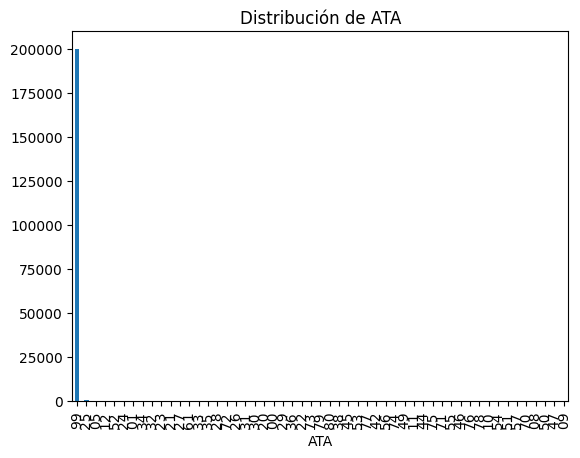

In [64]:
df['ATA'].value_counts().plot(kind='bar', title='Distribución de ATA')
# Tenemos un dataset desbalanceado, la categoria 99 predomina y practicamente ni vemos el resto de avería el impacto que han tenido.

Sin averías se le asignó el código 99. No obstante, produce un gran desbalanceo y para poder el impacto de las averías sera necesario realizar sobremuestreo en el caso de trabajar con multiclase.
Una opción y creo que será a la que enfoquemos el trabajo será en pasarlo a una bianria pero antes analizaremos un poco más el dataset.

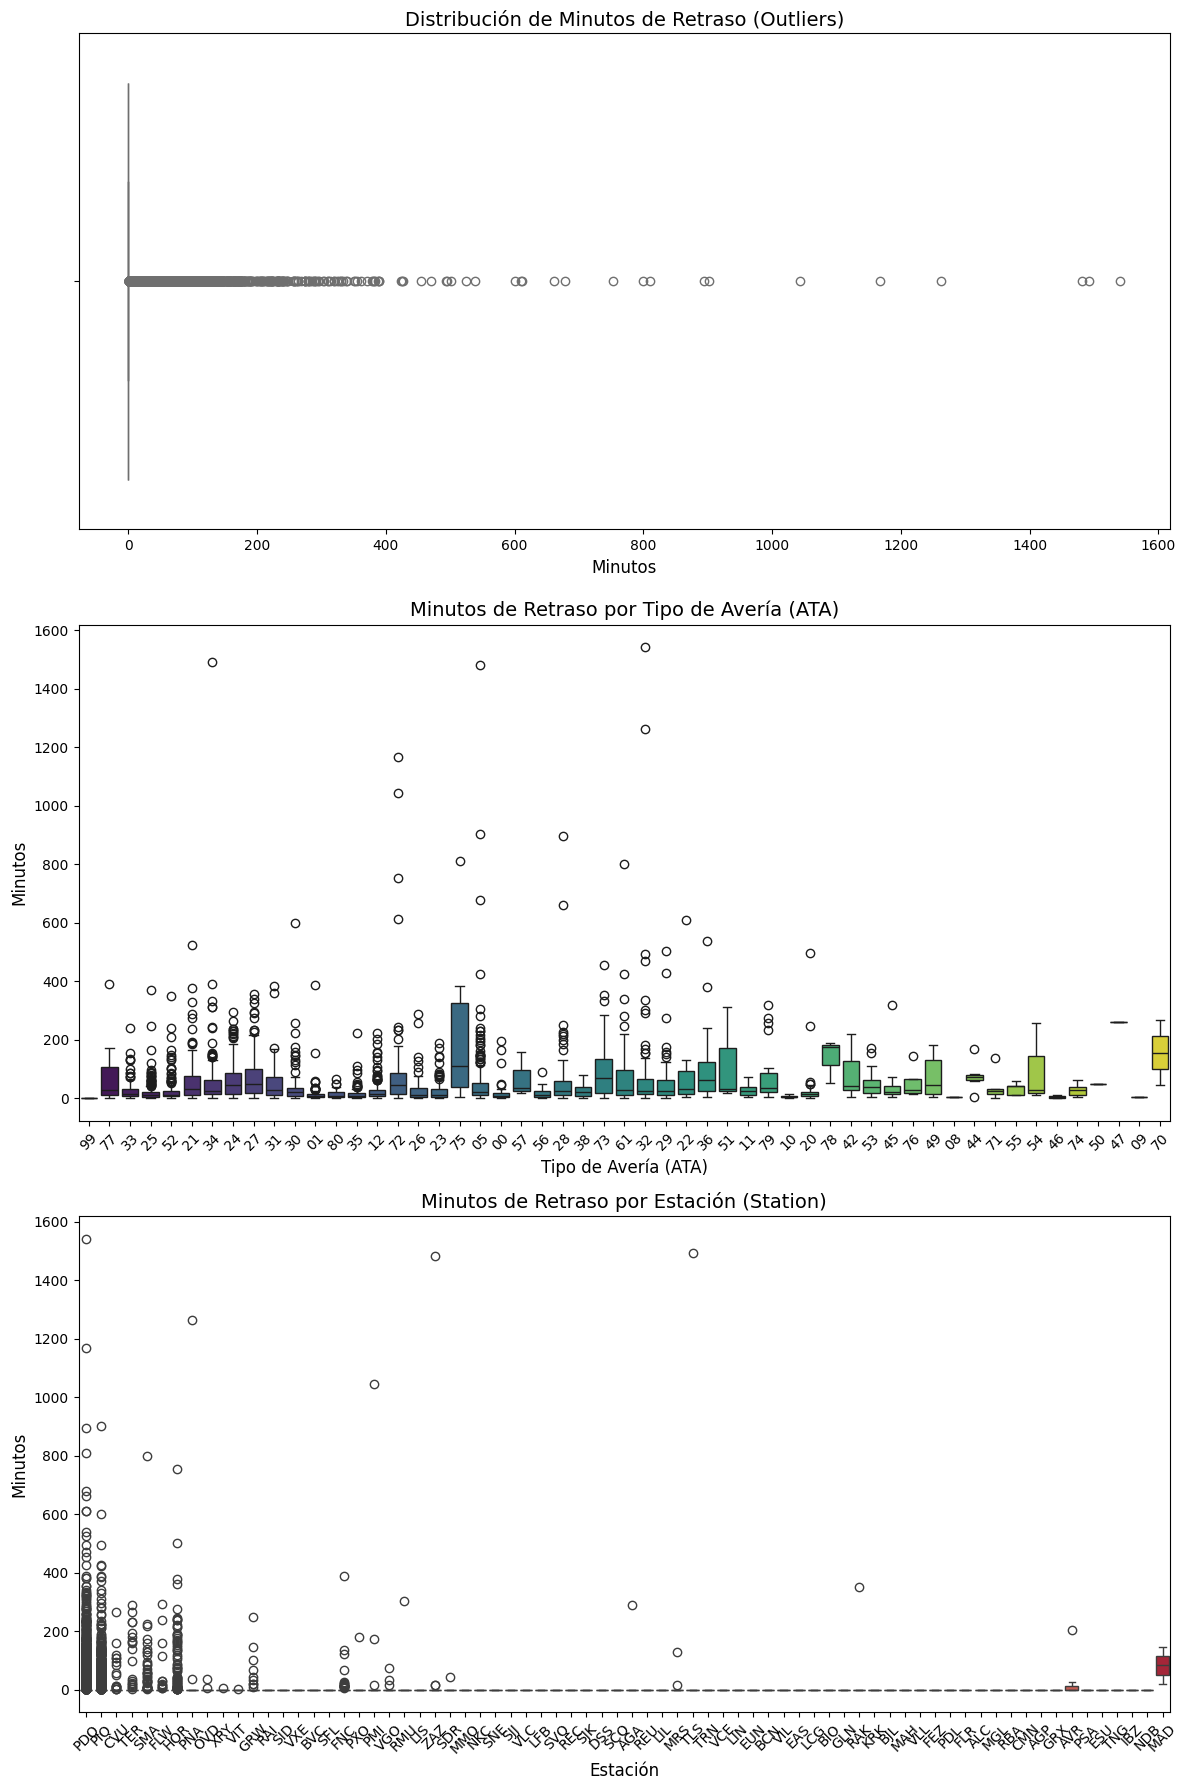

In [65]:
# Crear una figura con subplots (3 filas y 1 columna)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# **Subplot 1: Boxplot de minutos de retraso**
sns.boxplot(data=df, x='Minutos', ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Minutos de Retraso (Outliers)', fontsize=14)
axes[0].set_xlabel('Minutos', fontsize=12)
axes[0].set_ylabel('')

# **Subplot 2: Boxplot de minutos por tipo de avería (ATA)**
sns.boxplot(data=df, x='ATA', y='Minutos', ax=axes[1], palette='viridis', showfliers=True)
axes[1].set_title('Minutos de Retraso por Tipo de Avería (ATA)', fontsize=14)
axes[1].set_xlabel('Tipo de Avería (ATA)', fontsize=12)
axes[1].set_ylabel('Minutos', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# **Subplot 3: Boxplot de minutos por estación (Station)**
sns.boxplot(data=df, x='Station', y='Minutos', ax=axes[2], palette='coolwarm', showfliers=True)
axes[2].set_title('Minutos de Retraso por Estación (Station)', fontsize=14)
axes[2].set_xlabel('Estación', fontsize=12)
axes[2].set_ylabel('Minutos', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Observaciones de las visualizaciones:  

* Boxplot de Minutos:  
Se detectan varios outliers más aislados cercano a los 1600 minutos, con valores muy alejados del rango. La mayoría de eventos suceden hata alrededor de los 400 minutos. 

* Distribución de minutos por ATA:  
Los outliers estan más concentrados en algunas averías. No es uniforme. Al igual que los rangos son variados.  

* Distribución de Minutos por Station:  
ALgunas estaciones tienen outliers más frecuentes que en otras. Destacando las bases principales de mantenimiento PDQ y PIQ.

#### Variable Objetivo
Tenemos una gran variedad de averías, analizaremos el tarjet lo desbalanceado que sea.  
Tomaremos la decisión si profundizar en un modelo que prediga si hay avería o no hay avería o trabajar con una mucha diversidad.   
Para ello, tendremos en cuenta el número de vuelos que realiza cada avión y analizaremos las averías en distintas franjas de tiempo.  
Así podremos ver la evolución y relación, siendo quizás una causa clave.  


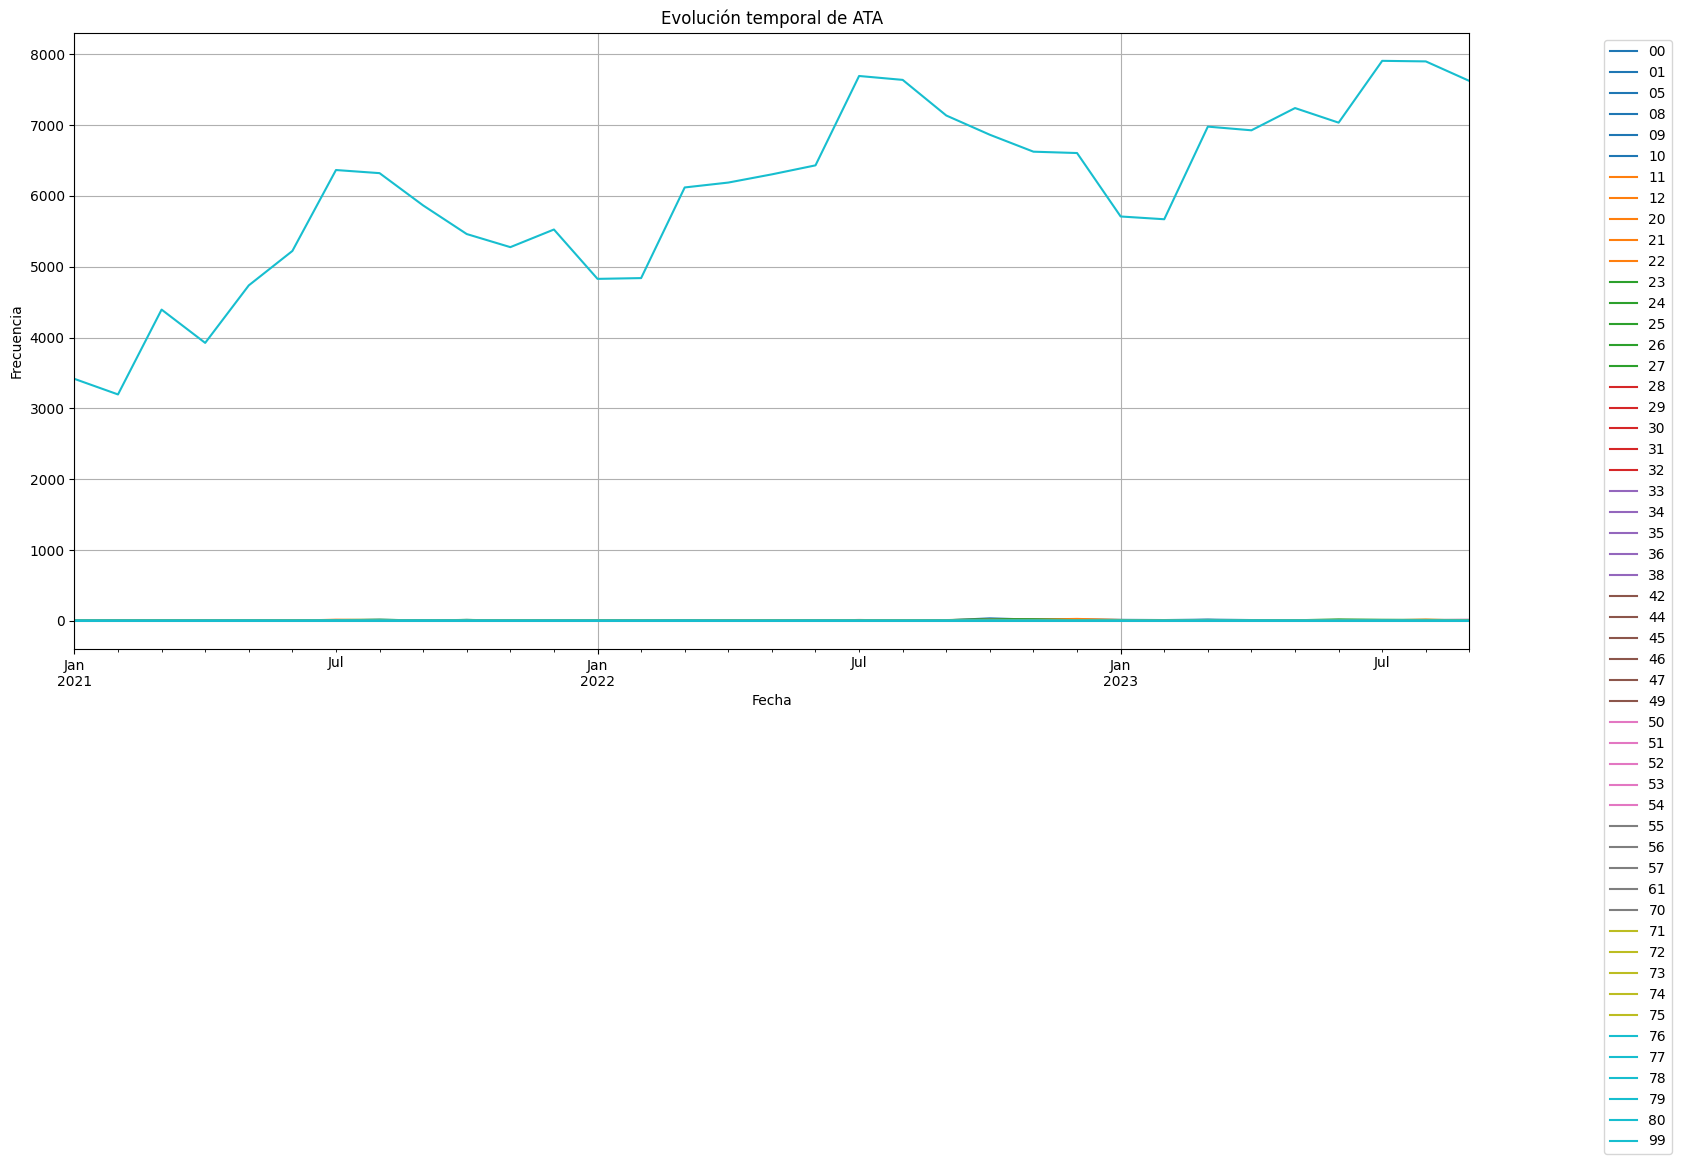

In [66]:
# Convertir 'Fecha' a formato datetime para análisis temporal
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# 3. Evolución temporal de ATA
ata_time = df.groupby([df['Fecha'].dt.to_period('M'), 'ATA']).size().unstack(fill_value=0)
ata_time.plot(kind='line', figsize=(18, 8), colormap='tab10')
plt.title('Evolución temporal de ATA')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

# La que destaca es 99 sin avería. 

In [67]:
# Calcular el número de vuelos por avión
vuelos_por_avion = df.groupby('AC')['Numero_vuelo'].count().reset_index()
vuelos_por_avion.columns = ['AC', 'Total_Vuelos']

In [68]:
# Añadir al dataset
df = df.merge(vuelos_por_avion, on='AC', how='left')

In [69]:
# Paso 3: Analizar averías por franjas horarias
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')  # Asegurar formato datetime
df['Hora'] = df['Fecha'].dt.hour  # Extraer la hora de la columna 'Fecha'
df['Franja_Horaria'] = pd.cut(df['Hora'], bins=[0, 6, 12, 18, 24], labels=['Madrugada', 'Mañana', 'Tarde', 'Noche'], right=False)

In [70]:
# Contar averías por franja horaria y tipo de avería
averias_franja = df.groupby(['Franja_Horaria', 'ATA']).size().unstack(fill_value=0)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203300 entries, 0 to 203299
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Fecha           203300 non-null  datetime64[ns]
 1   Numero_vuelo    203300 non-null  object        
 2   Station         203300 non-null  object        
 3   AC              203300 non-null  object        
 4   Minutos         203300 non-null  float64       
 5   ATA             203300 non-null  object        
 6   Total_Vuelos    203300 non-null  int64         
 7   Hora            203300 non-null  int32         
 8   Franja_Horaria  203300 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 11.8+ MB


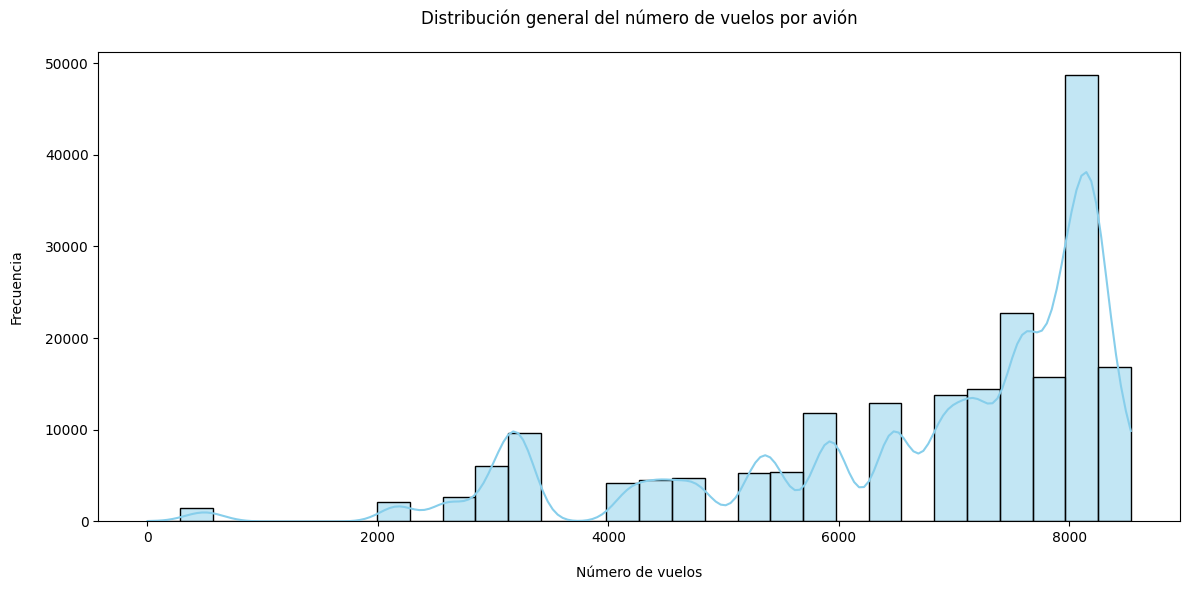

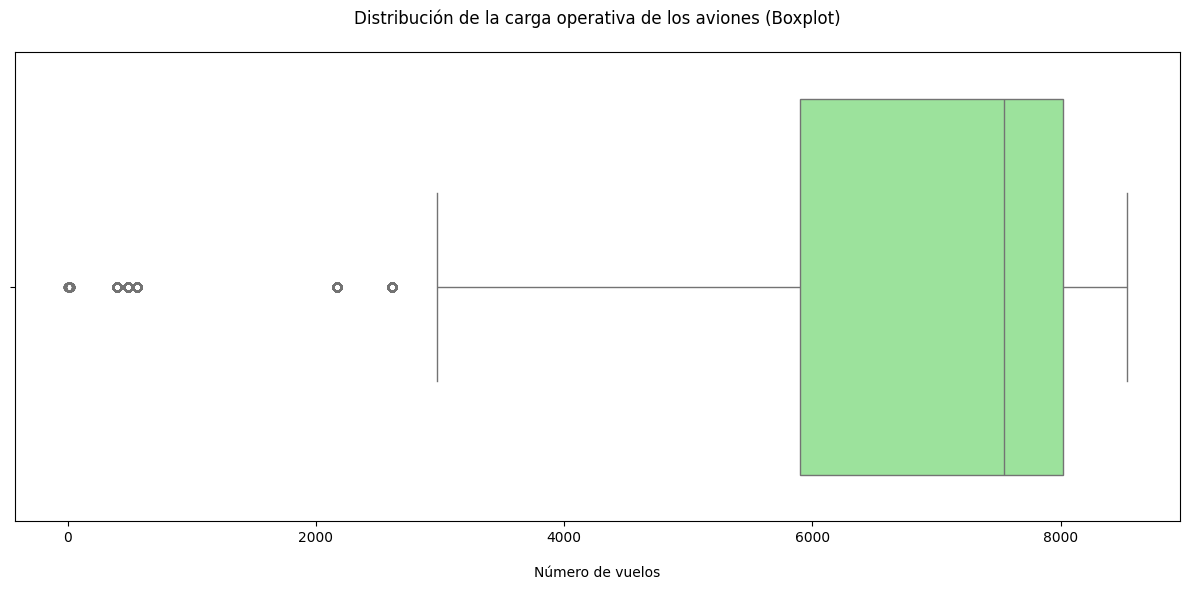

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


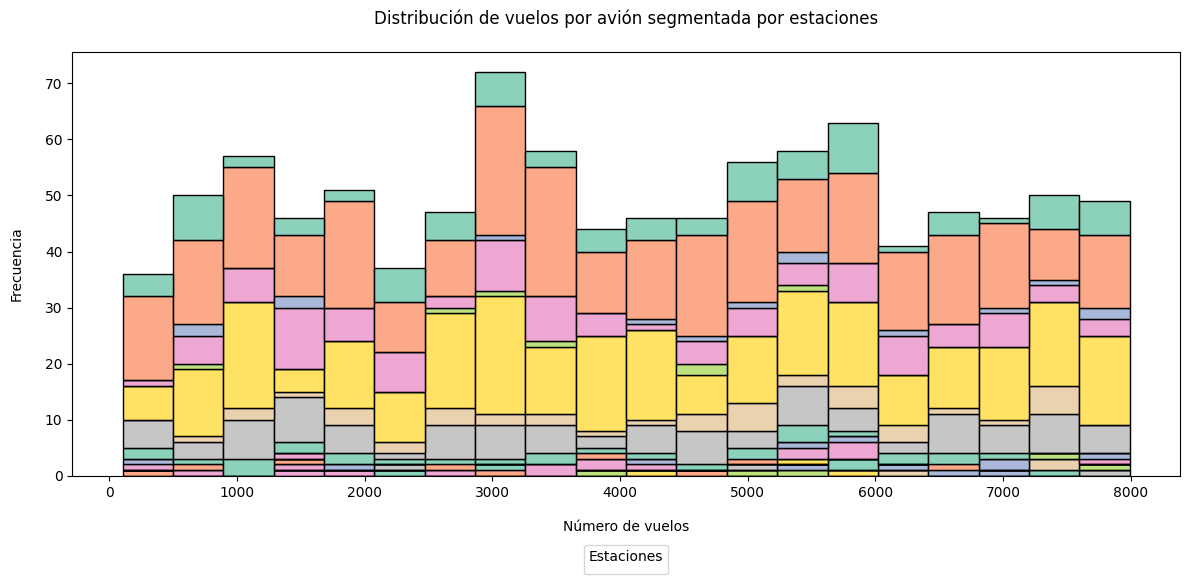

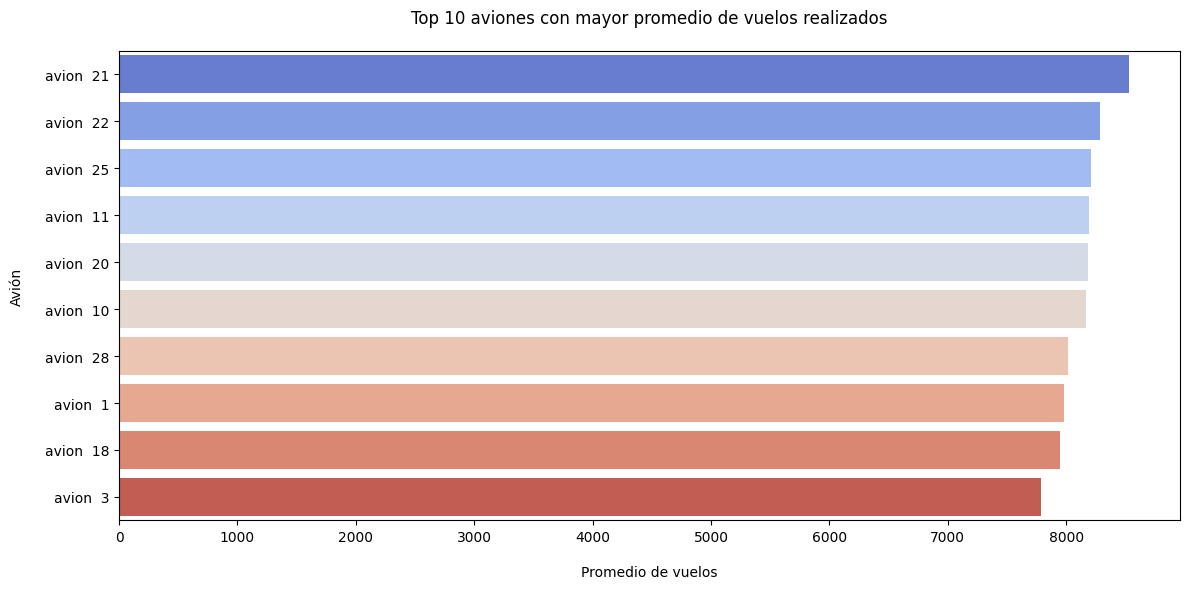

In [72]:
# Crear subgráficos para explorar diferentes aspectos del número de vuelos por avión

# Subgráfico 1: Histograma con rangos ajustados
plt.figure(figsize=(12, 6))
sns.histplot(df['Total_Vuelos'], bins=30, kde=True, color='skyblue')
plt.title('Distribución general del número de vuelos por avión', pad=20)
plt.xlabel('Número de vuelos', labelpad=15)
plt.ylabel('Frecuencia', labelpad=15)
plt.tight_layout()
plt.show()

# Subgráfico 2: Caja y bigotes para detectar aviones con cargas operativas extremas
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Total_Vuelos'], color='lightgreen')
plt.title('Distribución de la carga operativa de los aviones (Boxplot)', pad=20)
plt.xlabel('Número de vuelos', labelpad=15)
plt.tight_layout()
plt.show()

# Simular datos para estaciones y vuelos
np.random.seed(42)
stations = df["Station"]
data_simulated = pd.DataFrame({
    'Total_Vuelos': np.random.randint(100, 8000, 1000),
    'Station': np.random.choice(stations, 1000)
})

# Subgráfico: Histograma segmentado por estaciones con leyenda clara
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set2", len(stations))  # Paleta de colores bien diferenciados
sns.histplot(
    data=data_simulated,
    x='Total_Vuelos',
    hue='Station',
    bins=20,
    kde=False,
    multiple='stack',
    palette=palette
)
plt.title('Distribución de vuelos por avión segmentada por estaciones', pad=20)
plt.xlabel('Número de vuelos', labelpad=15)
plt.ylabel('Frecuencia', labelpad=15)
plt.legend(
    title='Estaciones',
    bbox_to_anchor=(0.5, -0.15),  # Posicionar la leyenda debajo del gráfico
    loc='upper center',
    ncol=len(stations),  # Una fila con todas las estaciones
    fontsize='small',
    frameon=True  # Añadir borde para mayor claridad
)
plt.tight_layout()
plt.show()


# Subgráfico 4: Promedio de vuelos realizados por avión
avg_flights = df.groupby('AC')['Total_Vuelos'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=avg_flights.index[:10], x=avg_flights.values[:10], palette='coolwarm')
plt.title('Top 10 aviones con mayor promedio de vuelos realizados', pad=20)
plt.xlabel('Promedio de vuelos', labelpad=15)
plt.ylabel('Avión', labelpad=15)
plt.tight_layout()
plt.show()


Subgráficos propuestos:  
1. Histograma general:  
Muestra la distribución general del número de vuelos realizados por avión, con una curva de densidad (kde) para visualizar la forma de la distribución.
Hay una cantidad reducida de aviones que realizan un número muy alto de vuelos (cola derecha de la distribución).
Esto sugiere que algunas aeronaves están sometidas a una carga operativa mucho mayor que otras.  


2. Boxplot (caja y bigotes):  
Muestra los aviones con cargas de viajes por fuera de lo normal (outliers). Esto nos ayuda a identificar si algunos aviones realizan un número significativamente mayor o menor de vuelos.

3. Histograma segmentado por estaciones (Station):  
Hay 2 estaciones que son las que más predominan por encima del resto. 
Aplicamos los datos por estación para mostrar diferencias entre ellas.  

4. Top 10 aviones con más vuelos:  
Resalta los 10 aviones con el mayor promedio de vuelos realizados, identificamos cuáles están sometidos a mayor carga operativa.

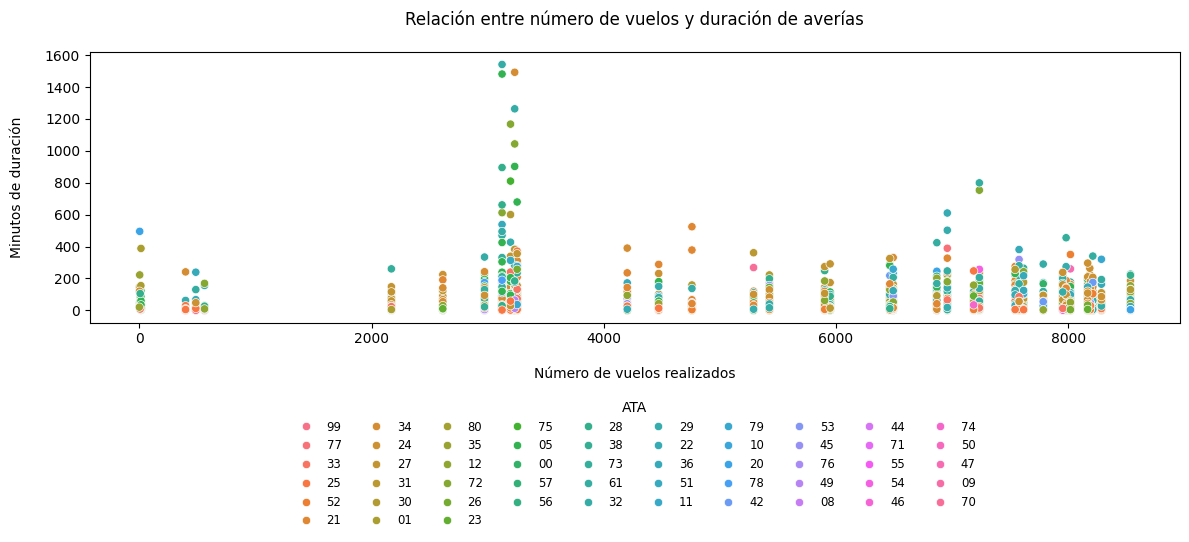

In [73]:
# Relación entre total de vuelos y duración de averías (leyenda en 3 filas horizontales)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Vuelos', y='Minutos', hue='ATA', data=df)
plt.title('Relación entre número de vuelos y duración de averías', pad=20)
plt.xlabel('Número de vuelos realizados', labelpad=15)
plt.ylabel('Minutos de duración', labelpad=15)
plt.legend(
    title='ATA',
    bbox_to_anchor=(0.5, -0.25),  # Ajustar posición debajo del gráfico
    loc='upper center',
    ncol=10,  # Ajustar columnas para que la leyenda ocupe 3 filas
    fontsize='small',
    frameon=False
)
plt.tight_layout()
plt.show()

Descripción del gráfico:  

* Este gráfico muestra una dispersión de los aviones, donde el eje x representa el número total de vuelos realizados y el eje y representa los minutos acumulados asociados a averías.
* Los puntos están coloreados según el tipo de avería (ATA).

Análisis:

* Existe una tendencia general: los aviones que realizan más vuelos tienden a acumular más minutos relacionados con averías, aunque también hay mucha dispersión.
* Algunos tipos de averías (ATA) tienen una mayor duración acumulada que otros.
* Esto sugiere que el número de vuelos podría ser un factor clave para explicar la duración de las averías.
* Hay relación entre el número de vuelos y las averías.
* Nos permite identificar patrones específicos asociados a ciertos tipos de averías (ATA).

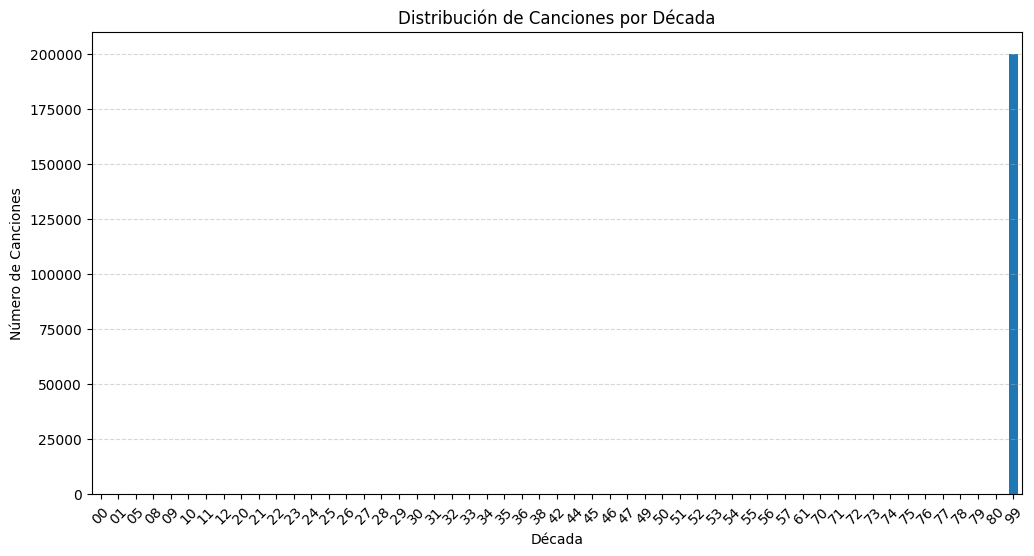

In [74]:
plt.figure(figsize=(12, 6))
df['ATA'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Canciones por Década')
plt.xlabel('Década')
plt.ylabel('Número de Canciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Claramente está desbalanceado

Si reemplazamos el valor "99" por "sin_averia" en el tarjee, ATA sería categórica, ya que representa diferentes estados o tipos de averías, incluyendo "sin_averia".  
Incluso si reducimos ATA a una variable binaria (avería/no avería), seguiría siendo categórica porque tiene dos categorías distintas.

Decisión:

Si una clase representa más del 80% (regla general), el dataset puede considerarse desbalanceado.
Esto podría requerir técnicas como:
Sobremuestreo: Crear más ejemplos de la clase minoritaria.
Submuestreo: Reducir ejemplos de la clase mayoritaria.
Ajuste de pesos: Dar más importancia a las clases minoritarias durante el entrenamiento del modelo.  

En este nos decantamos a convertir la variable en binaria.  
El objetivo del proyecto es crear un modelo funcional y "rápido" para evaluar el impacto de las averías.
Sin avería 0 (ATA 99) y con avería 1 (el resto).  
  
Pros y contras:   
  
*Pros*:   
Requiere menos cantidad de tiempo. Se intentó realizar la primera opción pero se descarto por falta del mismo.  
Modelo más simple y directo.  
Los resultados seran más sencillos de entender.  
  
*Contras*:    
Se conserva menos información del tipo especifico de avería.  
Se podría identificar relaciones más concretas entre las variables.  

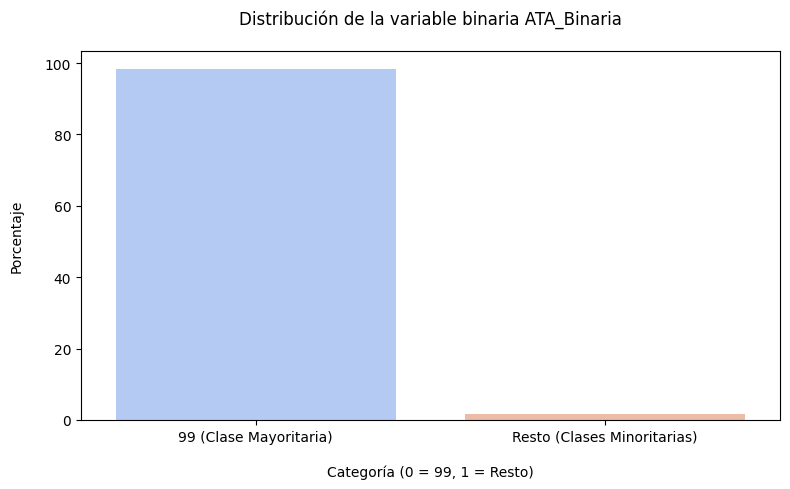

ATA
0    98.370389
1     1.629611
Name: proportion, dtype: float64


In [75]:
# Convertir la variable ATA a binaria usando numpy.where
df['ATA'] = np.where(df['ATA'] == '99', 0, 1)

# Verificar la distribución de la nueva variable binaria
ata_binaria_distribution = df['ATA'].value_counts(normalize=True) * 100

# Gráfico para visualizar la distribución de la variable binaria
plt.figure(figsize=(8, 5))
sns.barplot(x=ata_binaria_distribution.index, y=ata_binaria_distribution.values, palette='coolwarm')
plt.title('Distribución de la variable binaria ATA_Binaria', pad=20)
plt.xlabel('Categoría (0 = 99, 1 = Resto)', labelpad=15)
plt.ylabel('Porcentaje', labelpad=15)
plt.xticks([0, 1], ['99 (Clase Mayoritaria)', 'Resto (Clases Minoritarias)'])
plt.tight_layout()
plt.show()

# Mostrar las proporciones en texto
print(ata_binaria_distribution)


### EDA Binario

In [76]:
# 1. Estaciones donde más averías se reportan (ATA = 1)
top_estaciones_ata = df[df['ATA'] == 1]['Station'].value_counts().head(10)

In [77]:
# 2. Estaciones con mayor tiempo promedio de retraso (Minutos)
promedio_retraso_estaciones = df.groupby('Station')['Minutos'].mean().sort_values(ascending=False).head(10)


In [78]:
# 3. Media de vuelos entre averías en diferentes estaciones
# Calcular el número medio de vuelos entre averías
df_averias = df[df['ATA'] == 1].sort_values(by=['Station', 'Fecha'])
df_averias['Vuelos_Entre_Averias'] = df_averias.groupby('Station')['Total_Vuelos'].diff()
promedio_vuelos_entre_averias = df_averias.groupby('Station')['Vuelos_Entre_Averias'].mean().sort_values(ascending=False).head(10)



In [79]:
# Gráficos y análisis
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

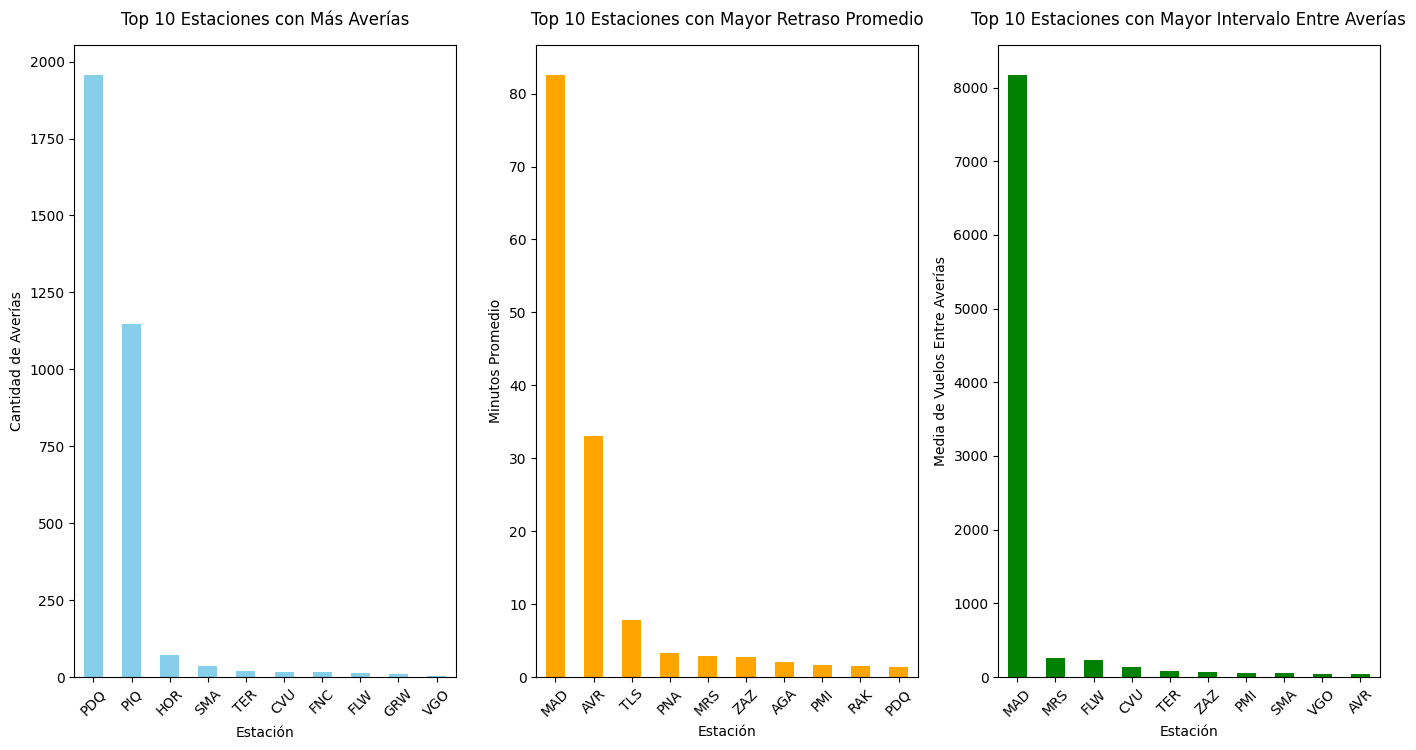

In [80]:
# Gráficos y análisis
plt.figure(figsize=(14, 8))  # Ajustar el tamaño del gráfico

# Estaciones con más averías
plt.subplot(1, 3, 1)
top_estaciones_ata.plot(kind='bar', color='skyblue')
plt.title("Top 10 Estaciones con Más Averías", fontsize=12, pad=15)  # Espacio extra con pad
plt.xlabel("Estación", fontsize=10)
plt.ylabel("Cantidad de Averías", fontsize=10)
plt.xticks(rotation=45)  # Rotar etiquetas para evitar solapamiento

# Estaciones con mayor tiempo promedio de retraso
plt.subplot(1, 3, 2)
promedio_retraso_estaciones.plot(kind='bar', color='orange')
plt.title("Top 10 Estaciones con Mayor Retraso Promedio", fontsize=12, pad=15)  # Espacio extra con pad
plt.xlabel("Estación", fontsize=10)
plt.ylabel("Minutos Promedio", fontsize=10)
plt.xticks(rotation=45)  # Rotar etiquetas para evitar solapamiento

# Media de vuelos entre averías
plt.subplot(1, 3, 3)
promedio_vuelos_entre_averias.plot(kind='bar', color='green')
plt.title("Top 10 Estaciones con Mayor Intervalo Entre Averías", fontsize=12, pad=15)  # Espacio extra con pad
plt.xlabel("Estación", fontsize=10)
plt.ylabel("Media de Vuelos Entre Averías", fontsize=10)
plt.xticks(rotation=45)  # Rotar etiquetas para evitar solapamiento

# Ajustar espacios entre gráficos y los márgenes
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Espacio entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Reducir márgenes si es necesario

plt.show()


* Estaciones con más averías:  
Las estaciones más con retrasos son las dos bases principales donde tenemos los centros de mantenimiento.  

* Estaciones con mayor tiempo promedio de retraso (Minutos):  
Algunas estaciones, aunque no lideran en cantidad de averías, tienen tiempos de retraso considerablemente altos. Esto podría indicar problemas operativos. Además, solo aparece uno de los centros principales de mantenimiento PDQ.  

* Media de vuelos entre averías:  
Hay estaciones donde las averías son mucho más frecuentes. Esto sugiere la posibilidad de un mantenimiento ineficaz o condiciones adversas persistentes.  

* Conclusión:  
Este análisis inicial revela tendencias claras en las estaciones que generan más averías y retrasos.  
Además, la media de vuelos entre averías refuerza la importancia de investigar factores locales para mejorar la fiabilidad del servicio.  
Estas observaciones servirán para ajustar nuestro modelo predictivo.

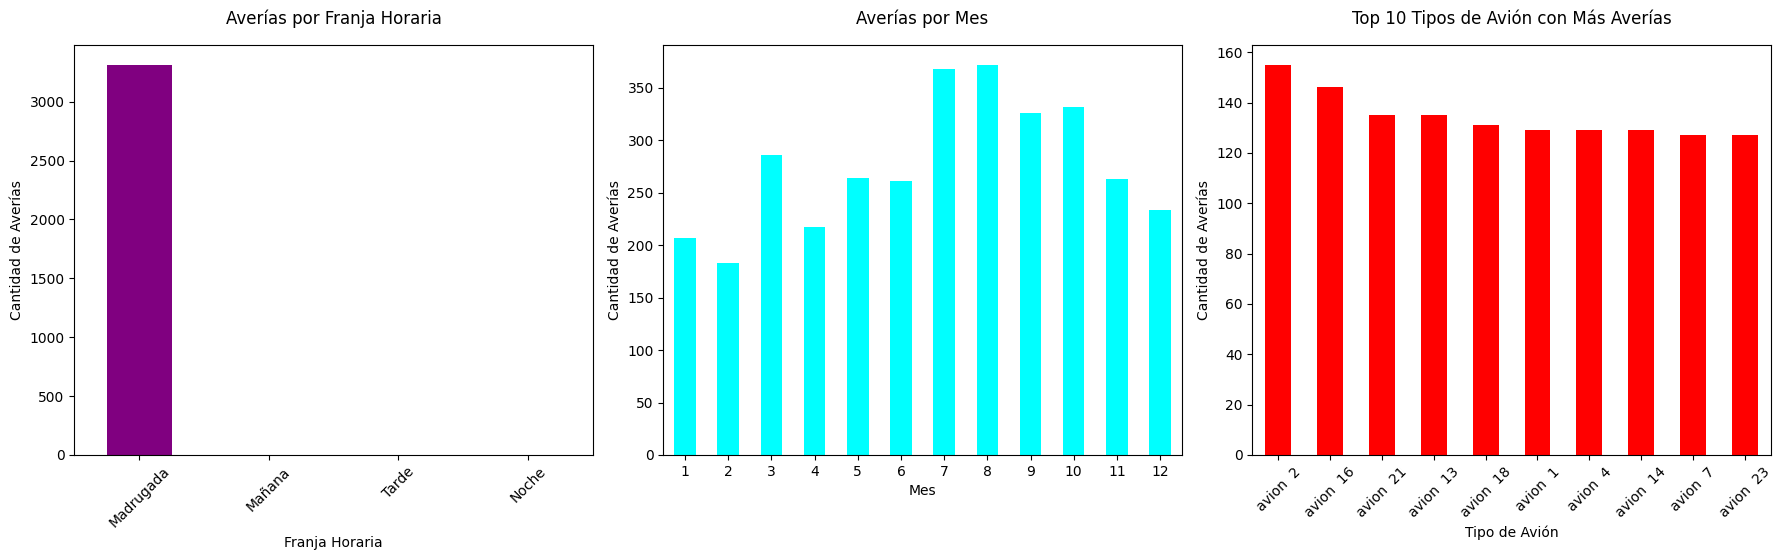

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# 4. Análisis adicional para extraer información valiosa para el modelo

# Averías por franja horaria
averias_por_franja = df[df['ATA'] == 1]['Franja_Horaria'].value_counts()

# Averías por mes
df['Fecha'] = pd.to_datetime(df['Fecha'])  # Convertir a formato datetime
df['Mes'] = df['Fecha'].dt.month
averias_por_mes = df[df['ATA'] == 1]['Mes'].value_counts().sort_index()

# Averías por tipo de avión (AC)
averias_por_ac = df[df['ATA'] == 1]['AC'].value_counts().head(10)

# Gráficos para los análisis adicionales
plt.figure(figsize=(18, 6))

# Averías por franja horaria
plt.subplot(1, 3, 1)
averias_por_franja.plot(kind='bar', color='purple')
plt.title("Averías por Franja Horaria", fontsize=12, pad=15)  # Espacio adicional con pad
plt.ylabel("Cantidad de Averías", fontsize=10)
plt.xlabel("Franja Horaria", fontsize=10)
plt.xticks(rotation=45)  # Rotar etiquetas para evitar solapamiento

# Averías por mes
plt.subplot(1, 3, 2)
averias_por_mes.plot(kind='bar', color='cyan')
plt.title("Averías por Mes", fontsize=12, pad=15)  # Espacio adicional con pad
plt.ylabel("Cantidad de Averías", fontsize=10)
plt.xlabel("Mes", fontsize=10)
plt.xticks(rotation=0)  # Meses suelen ser números, rotación no es necesaria

# Averías por tipo de avión
plt.subplot(1, 3, 3)
averias_por_ac.plot(kind='bar', color='red')
plt.title("Top 10 Tipos de Avión con Más Averías", fontsize=12, pad=15)  # Espacio adicional con pad
plt.ylabel("Cantidad de Averías", fontsize=10)
plt.xlabel("Tipo de Avión", fontsize=10)
plt.xticks(rotation=45)  # Rotar etiquetas para evitar solapamiento

# Ajustar espacios entre gráficos
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Ajustar espacio horizontal entre gráficos
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar márgenes

plt.show()


* Averías por franja horaria:  
Las averías parecen ser más frecuente en la madrugada. Esto podría estar relacionado con los ciclos de mantenimiento.  

* Averías por mes:  
Algunos meses presentan un mayor número de averías. Esto podría deberse a factores estacionales, como el clima o períodos de mayor actividad aérea (por ejemplo, vacaciones).  

* Averías por tipo de avión (AC):  
Hay ciertos tipos de aviones que tienen un número significativamente mayor de averías. Esto sugiere que ciertas aeronaves podrían requerir un análisis más profundo sobre su mantenimiento o condiciones operativas.  

* Conclusión:  
Las franjas horarias y los meses con mayor incidencia de averías sugieren patrones temporales relevantes.  
Estas observaciones ofrecen bases sólidas para ajustar nuestro modelo predictivo.  

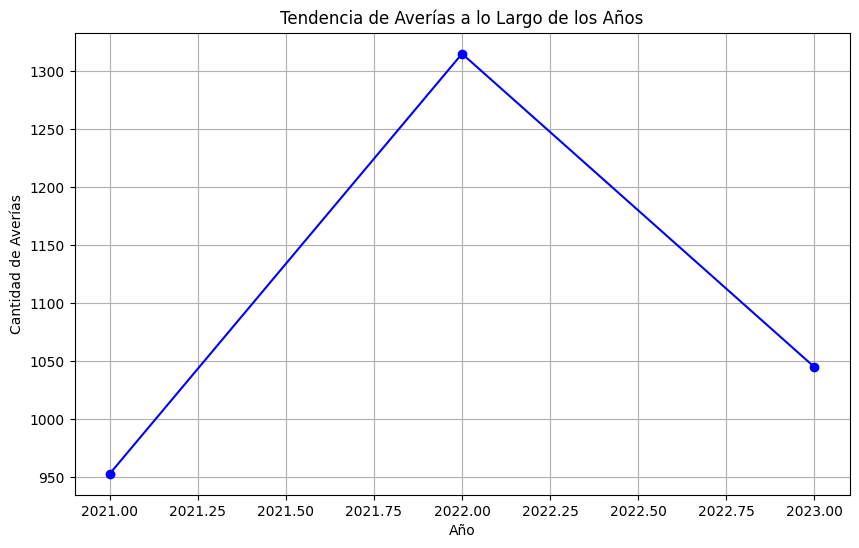

In [82]:
# Análisis de tendencias: Averías a lo largo de los años

# Extraer año de la fecha
df['Año'] = df['Fecha'].dt.year

# Contar averías por año
averias_por_ano = df[df['ATA'] == 1].groupby('Año').size()

# Visualización de tendencias anuales
plt.figure(figsize=(10, 6))
averias_por_ano.plot(kind='line', marker='o', color='blue')
plt.title("Tendencia de Averías a lo Largo de los Años")
plt.ylabel("Cantidad de Averías")
plt.xlabel("Año")
plt.grid(True)
plt.show()

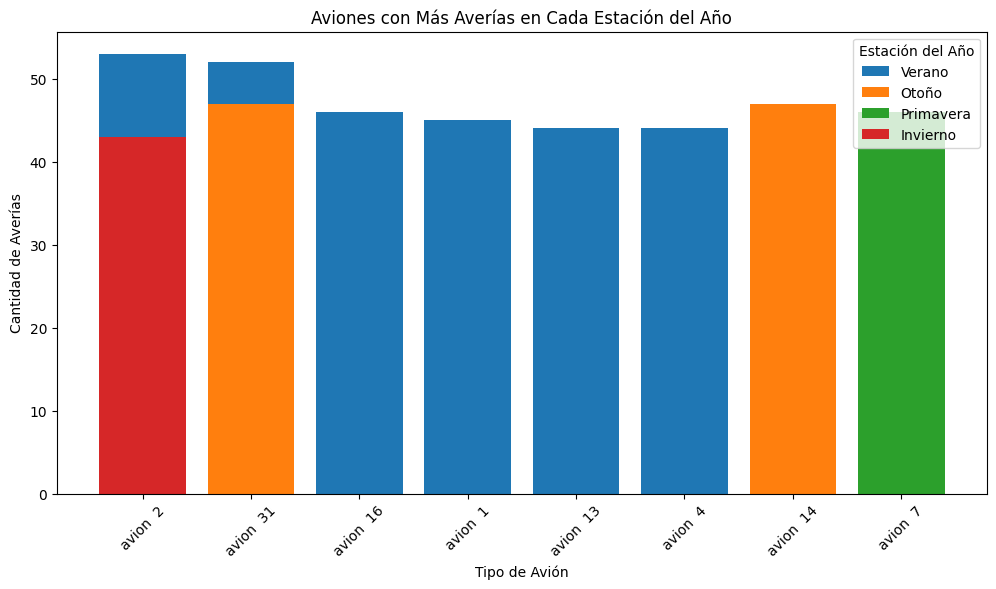

,AC,Estacion_Ano,Total_Averias
47,avion 2,Verano,53
95,avion 31,Verano,52
93,avion 31,Otoño,47
21,avion 14,Otoño,47
31,avion 16,Verano,46
144,avion 7,Primavera,46
3,avion 1,Verano,45
19,avion 13,Verano,44
128,avion 4,Verano,44
44,avion 2,Invierno,43


In [83]:
# Clustering: Agrupar aviones y estaciones según averías en épocas del año
# Definir estaciones del año
def estacion_del_ano(mes):
    if mes in [12, 1, 2]:
        return 'Invierno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

df['Estacion_Ano'] = df['Mes'].apply(estacion_del_ano)

# Agrupación por tipo de avión y estación del año para encontrar los aviones con más averías
clustering_data = df[df['ATA'] == 1].groupby(['AC', 'Estacion_Ano']).size().reset_index(name='Total_Averias')

# Filtrar las combinaciones con más averías
top_aviones_estaciones = clustering_data.sort_values(by='Total_Averias', ascending=False).head(10)

# Visualización de los resultados
plt.figure(figsize=(12, 6))
for estacion in top_aviones_estaciones['Estacion_Ano'].unique():
    subset = top_aviones_estaciones[top_aviones_estaciones['Estacion_Ano'] == estacion]
    plt.bar(subset['AC'], subset['Total_Averias'], label=estacion)

plt.title("Aviones con Más Averías en Cada Estación del Año")
plt.xlabel("Tipo de Avión")
plt.ylabel("Cantidad de Averías")
plt.legend(title="Estación del Año")
plt.xticks(rotation=45)
plt.show()

# Mostrar top combinaciones de avión y estación
top_aviones_estaciones

* Tendencias de averías a lo largo de los años:  
Hay un incremento en 2022 y decremento en 2023, esto puede ser útil para entender si las estrategias de mantenimiento están mejorando o si hay problemas persistentes.  

* Clustering por estaciones del año y tipo de avión:  
Los tipos de avión con más averías y las épocas del año con mayor incidencia son claramente identificables.  
Por ejemplo:  
Avión 2 es particularmente problemático en verano e invierno.  
Avión 31 destaca tanto en verano como en otoño.  
Avión 7 tiene un número alto de averías en primavera.  

* Conclusión para el modelo:  
Este análisis sugiere que los factores estacionales y tipo de avión son importantes para predecir averías.
Estos resultados pueden guiar la creación de nuevas variables predictoras que combinen estacionalidad y características del avión para mejorar la precisión del modelo.

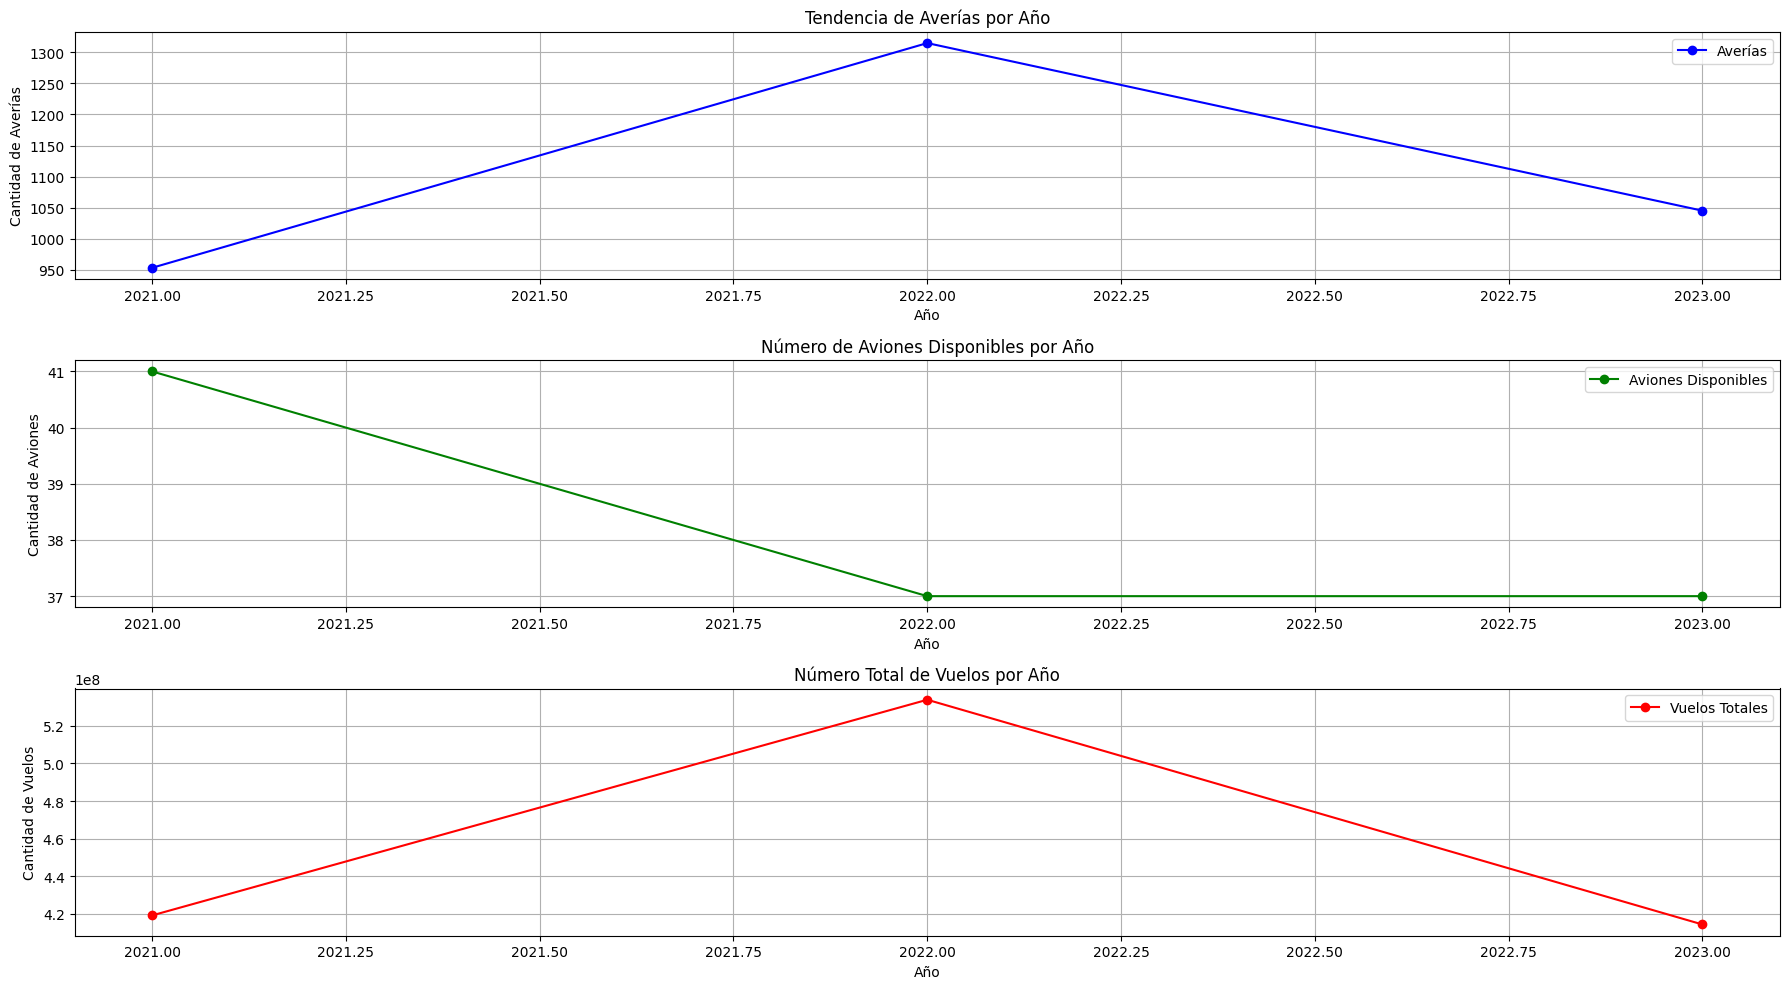

In [84]:
# Calcular número de aviones únicos y vuelos totales por año
aviones_por_ano = df.groupby('Año')['AC'].nunique()
vuelos_totales_por_ano = df.groupby('Año')['Total_Vuelos'].sum()

# Crear subgráficos
plt.figure(figsize=(18, 10))

# Subgráfico 1: Tendencia de averías por año
plt.subplot(3, 1, 1)
averias_por_ano.plot(kind='line', marker='o', color='blue', label='Averías')
plt.title("Tendencia de Averías por Año")
plt.ylabel("Cantidad de Averías")
plt.xlabel("Año")
plt.grid(True)
plt.legend()

# Subgráfico 2: Número de aviones disponibles por año
plt.subplot(3, 1, 2)
aviones_por_ano.plot(kind='line', marker='o', color='green', label='Aviones Disponibles')
plt.title("Número de Aviones Disponibles por Año")
plt.ylabel("Cantidad de Aviones")
plt.xlabel("Año")
plt.grid(True)
plt.legend()

# Subgráfico 3: Número total de vuelos por año
plt.subplot(3, 1, 3)
vuelos_totales_por_ano.plot(kind='line', marker='o', color='red', label='Vuelos Totales')
plt.title("Número Total de Vuelos por Año")
plt.ylabel("Cantidad de Vuelos")
plt.xlabel("Año")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

* Tendencia de averías:    
La cantidad de averías ha mostrado una tendencia cambiante/creciente/estable aunque los datos son hasta septiembre de 2023.  
Este comportamiento podría estar relacionado con factores como el aumento del tráfico aéreo, posibles insuficiencias en el mantenimiento o el envejecimiento de las flotas.  

* Número de aviones disponibles:  
El número de aviones disponibles ha aumentado/disminuido/se mantenido estable.
Este incremento está asociado a un aumento en la oferta de vuelos y, más averías.  

* Número de vuelos por año:  
El número de vuelos ha incrementado/disminuido a lo largo del tiempo.  
Esto es relevante porque un mayor número de vuelos puede influir en el desgaste de las aeronaves y las tasas de averías.   
Un aumento continuo sacrificando tareas complementarios de mantenimiento y llevando al límite de la vida los componentes podría ser una causa subyacente del comportamiento observado.  

In [ ]:
# Guardar el archivo como CSV
df.to_csv('./data/combinada_binaria.csv', index=False)

# Verificar que se haya guardado correctamente
print("Archivo guardado como 'combinada_binaria.csv'")


Archivo guardado como 'combinada_binaria.csv'


#### **Conclusiones miniEDA:**

Este análisis sugiere que los factores estacionales y tipo de avión son importantes para predecir averías.
Cone stos resultados se podría plantear nuevas variables que combinen estacionalidad y características del avión para mejorar la precisión del modelo.

* Averías por franja horaria:  
Las averías parecen ser más frecuente en la madrugada, se ejecutan trabajos planificados durante la noche fuera del horario operativo. 
Algunos meses presentan un mayor número de averías. Esto podría deberse a factores estacionales, como el clima o períodos de mayor actividad aérea (por ejemplo, vacaciones).  

* Averías por tipo de avión (AC):  
Hay ciertos tipos de aviones que tienen un número significativamente mayor de averías. Esto sugiere que ciertas aeronaves podrían requerir un análisis más profundo sobre su mantenimiento o condiciones operativas.  

* Estaciones con más averías:  
Las estaciones más con retrasos son las dos bases principales donde tenemos los centros de mantenimiento.  

* Estaciones con mayor tiempo promedio de retraso (Minutos):  
Algunas estaciones, aunque no lideran en cantidad de averías, tienen tiempos de retraso considerablemente altos. 
Podría indicar problemas operativos. Además, solo aparece uno de los centros principales de mantenimiento PDQ.  

* Media de vuelos entre averías:  
Hay estaciones donde las averías son mucho más frecuentes. 